# Data Visualization with Python - Week 4

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [86]:
gun_df = pd.read_csv("guns.csv")
gun_df.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


#### How does the number of annual suicide gun-deaths vary across the years, by Gender?

In [87]:
gun_df.groupby(['year', 'sex']).value_counts()

year  sex  Unnamed: 0  month  intent    police  age   race                    hispanic  place              education   
2012  F    2           1      Suicide   0       21.0  White                   100       Street             Some college    1
           22          4      Suicide   0       52.0  White                   100       Home               HS/GED          1
           29127       7      Suicide   0       69.0  White                   100       Home               HS/GED          1
           29183       7      Homicide  0       76.0  Asian/Pacific Islander  100       Home               Less than HS    1
           29172       7      Homicide  0       76.0  White                   100       Other unspecified  Less than HS    1
                                                                                                                          ..
2014  M    81102       5      Homicide  0       32.0  Black                   100       Street             HS/GED          1
     

In [88]:
suicides = gun_df[gun_df.intent=='Suicide']

In [89]:
suicides.groupby(['year', 'sex']).value_counts()

year  sex  Unnamed: 0  month  intent   police  age   race      hispanic  place   education   
2012  F    2           1      Suicide  0       21.0  White     100       Street  Some college    1
           22          4      Suicide  0       52.0  White     100       Home    HS/GED          1
           31895       11     Suicide  0       26.0  White     100       Home    Some college    1
           31594       12     Suicide  0       60.0  White     100       Home    BA+             1
           31595       12     Suicide  0       81.0  White     100       Home    HS/GED          1
                                                                                                ..
2014  M    82079       4      Suicide  0       43.0  White     100       Home    HS/GED          1
           82080       5      Suicide  0       27.0  White     100       Home    Some college    1
           82083       5      Suicide  0       79.0  White     100       Home    HS/GED          1
           8208

<Axes: xlabel='year,sex'>

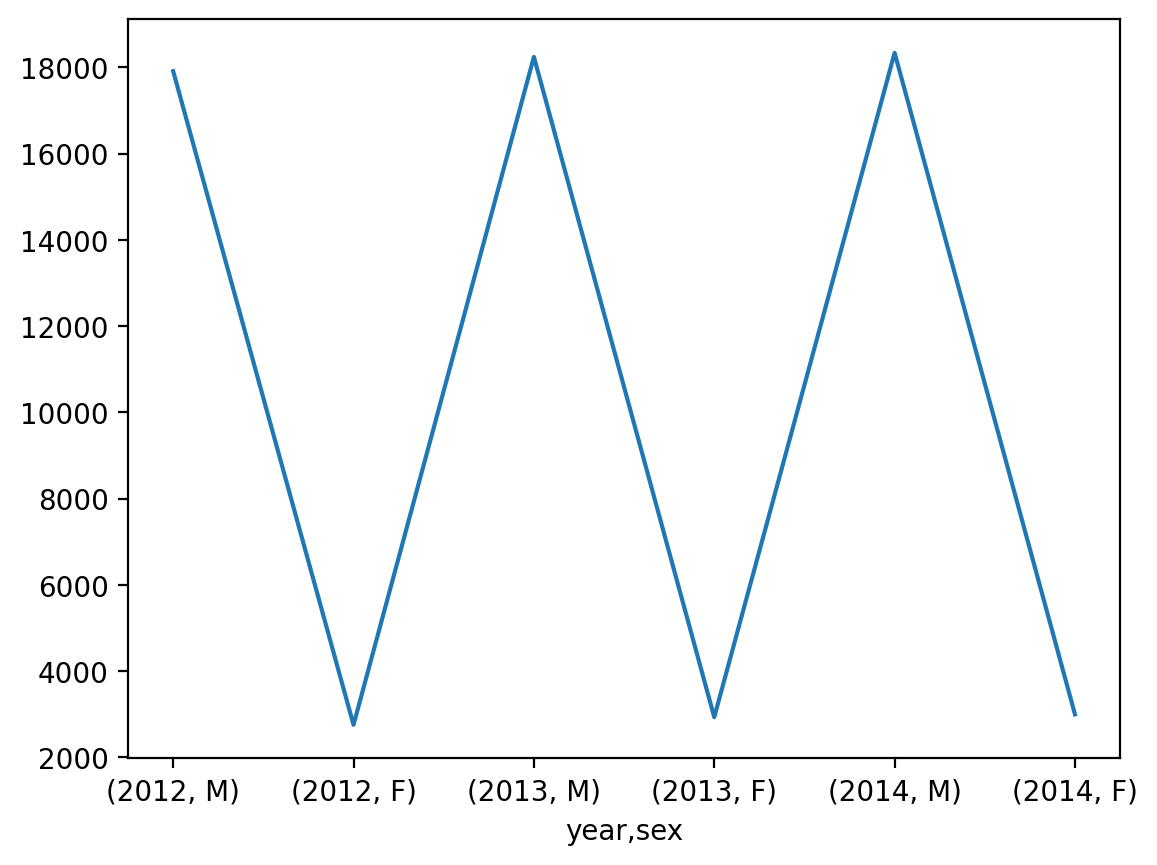

In [90]:
suicides.groupby('year')['sex'].value_counts().plot()

In [91]:
suicides_df =  pd.DataFrame(data=suicides.groupby('year')['sex'].value_counts()).reset_index()
suicides_df.head()

,year,sex,count
0,2012,M,17910
1,2012,F,2756
2,2013,M,18241
3,2013,F,2934
4,2014,M,18335


In [92]:
males = suicides_df[suicides_df['sex']=='M']
males

,year,sex,count
0,2012,M,17910
2,2013,M,18241
4,2014,M,18335


In [93]:
females = suicides_df[suicides_df['sex']=='F']
females

,year,sex,count
1,2012,F,2756
3,2013,F,2934
5,2014,F,2999


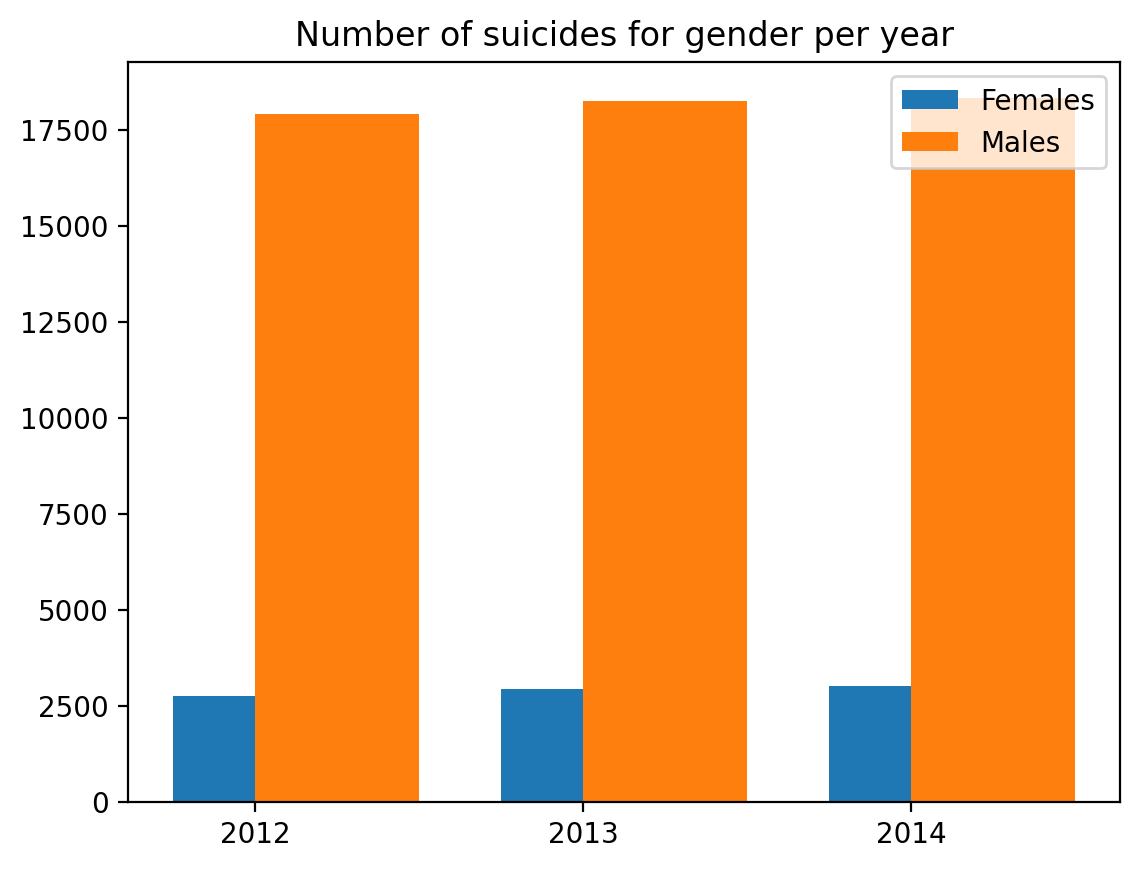

In [94]:
plt.bar(males['year'], females['count'], width=0.5, align="center", label="Females")
plt.bar(males['year'], males['count'], width=0.5, align="edge", label="Males")
plt.xticks(ticks=males['year'], labels=males['year'])
plt.legend()
plt.title("Number of suicides for gender per year")
plt.show()

In [95]:
by_race =  pd.DataFrame(data=suicides.groupby('year')['race'].value_counts()).reset_index()

In [96]:
by_race['race'].unique()

array(['White', 'Black', 'Hispanic', 'Asian/Pacific Islander',
       'Native American/Native Alaskan'], dtype=object)

In [97]:
all_races = []

for race in by_race['race'].unique():
    all_races.append(by_race[by_race['race']==race])

#### What is the number of gun-deaths by race per 100,000 people in the USA?

In [99]:
gun_df.columns

Index(['Unnamed: 0', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race',
       'hispanic', 'place', 'education'],
      dtype='object')

In [100]:
gun_deaths_by_race = gun_df['race'].value_counts().reset_index()
gun_deaths_by_race.columns = ['race', 'deaths']

In [101]:
gun_deaths_by_race.head()

,race,deaths
0,White,66237
1,Black,23296
2,Hispanic,9022
3,Asian/Pacific Islander,1326
4,Native American/Native Alaskan,917


#### Let us assume that the US population is 300M

In [102]:
gun_deaths_by_race['per_100'] = gun_deaths_by_race['deaths']/300000000*100000
gun_deaths_by_race

,race,deaths,per_100
0,White,66237,22.079000
1,Black,23296,7.765333
2,Hispanic,9022,3.007333
3,Asian/Pacific Islander,1326,0.442000
4,Native American/Native Alaskan,917,0.305667


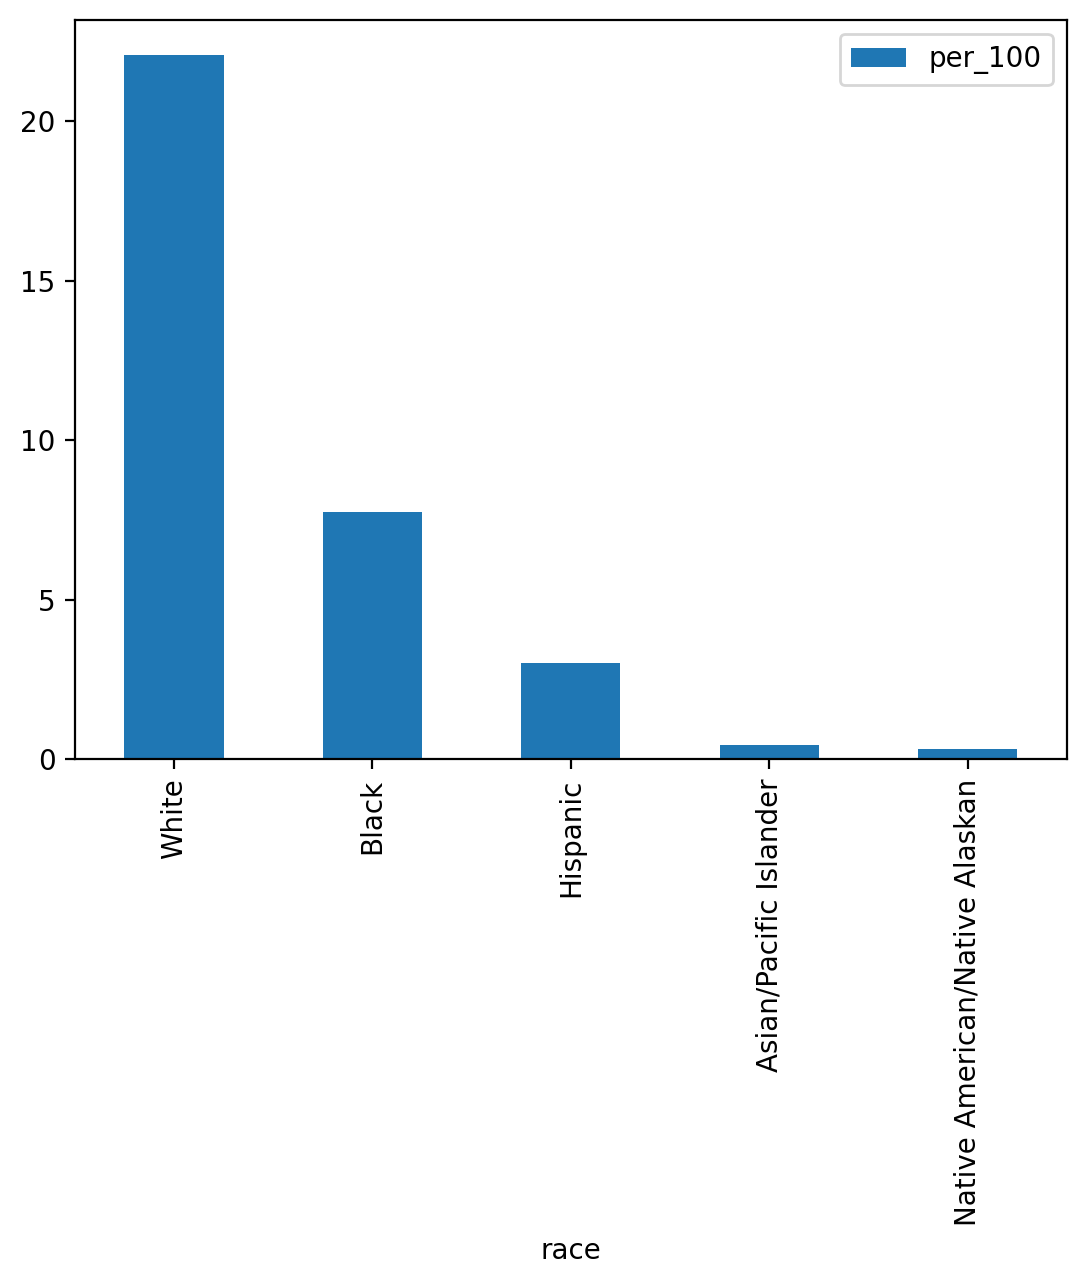

In [103]:
gun_deaths_by_race[['race', 'per_100']].set_index('race').plot(kind='bar')
plt.show()

#### What is the average number of gun-deaths by cause, in the USA?

In [104]:
gun_df.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


In [105]:
gun_df.intent.value_counts()

intent
Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Name: count, dtype: int64

In [106]:
deaths_by_cause = pd.DataFrame(data=gun_df['intent'].value_counts()).reset_index()

In [107]:
deaths_by_cause

,intent,count
0,Suicide,63175
1,Homicide,35176
2,Accidental,1639
3,Undetermined,807


In [108]:
deaths_by_cause['average_death'] = deaths_by_cause['count']/gun_df.shape[0]
deaths_by_cause.head()

,intent,count,average_death
0,Suicide,63175,0.626749
1,Homicide,35176,0.348975
2,Accidental,1639,0.016260
3,Undetermined,807,0.008006


<BarContainer object of 4 artists>

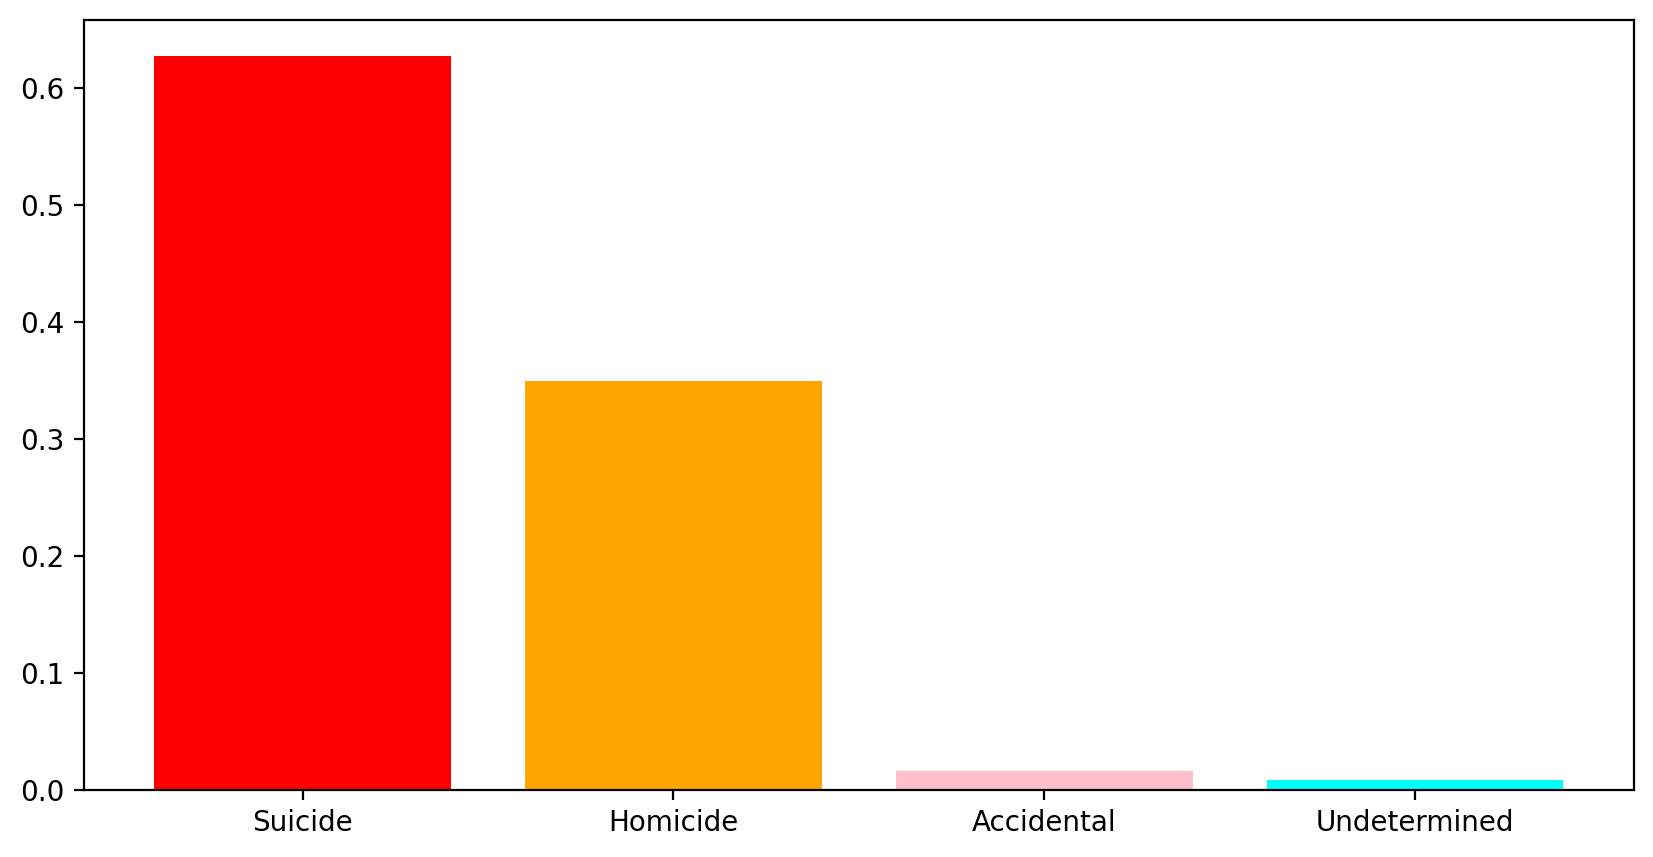

In [114]:
plt.figure(figsize=(10,5))
plt.bar(x=deaths_by_cause['intent'], height=deaths_by_cause['average_death'], color=['red', 'orange', 'pink', 'cyan'])

#### What is the percentage per 100,000 people of annual gun deaths in the United States from 2012 to 2014, by cause?

In [116]:
gun_deaths_by_intent = gun_df['intent'].value_counts().reset_index()
gun_deaths_by_intent.columns = ['intent', 'deaths']

In [117]:
gun_deaths_by_intent

,intent,deaths
0,Suicide,63175
1,Homicide,35176
2,Accidental,1639
3,Undetermined,807


In [118]:
# Assuming the population of the US is 300M

gun_deaths_by_intent['per_100'] = gun_deaths_by_intent['deaths']/300000000*100000
gun_deaths_by_intent

,intent,deaths,per_100
0,Suicide,63175,21.058333
1,Homicide,35176,11.725333
2,Accidental,1639,0.546333
3,Undetermined,807,0.269000


<BarContainer object of 4 artists>

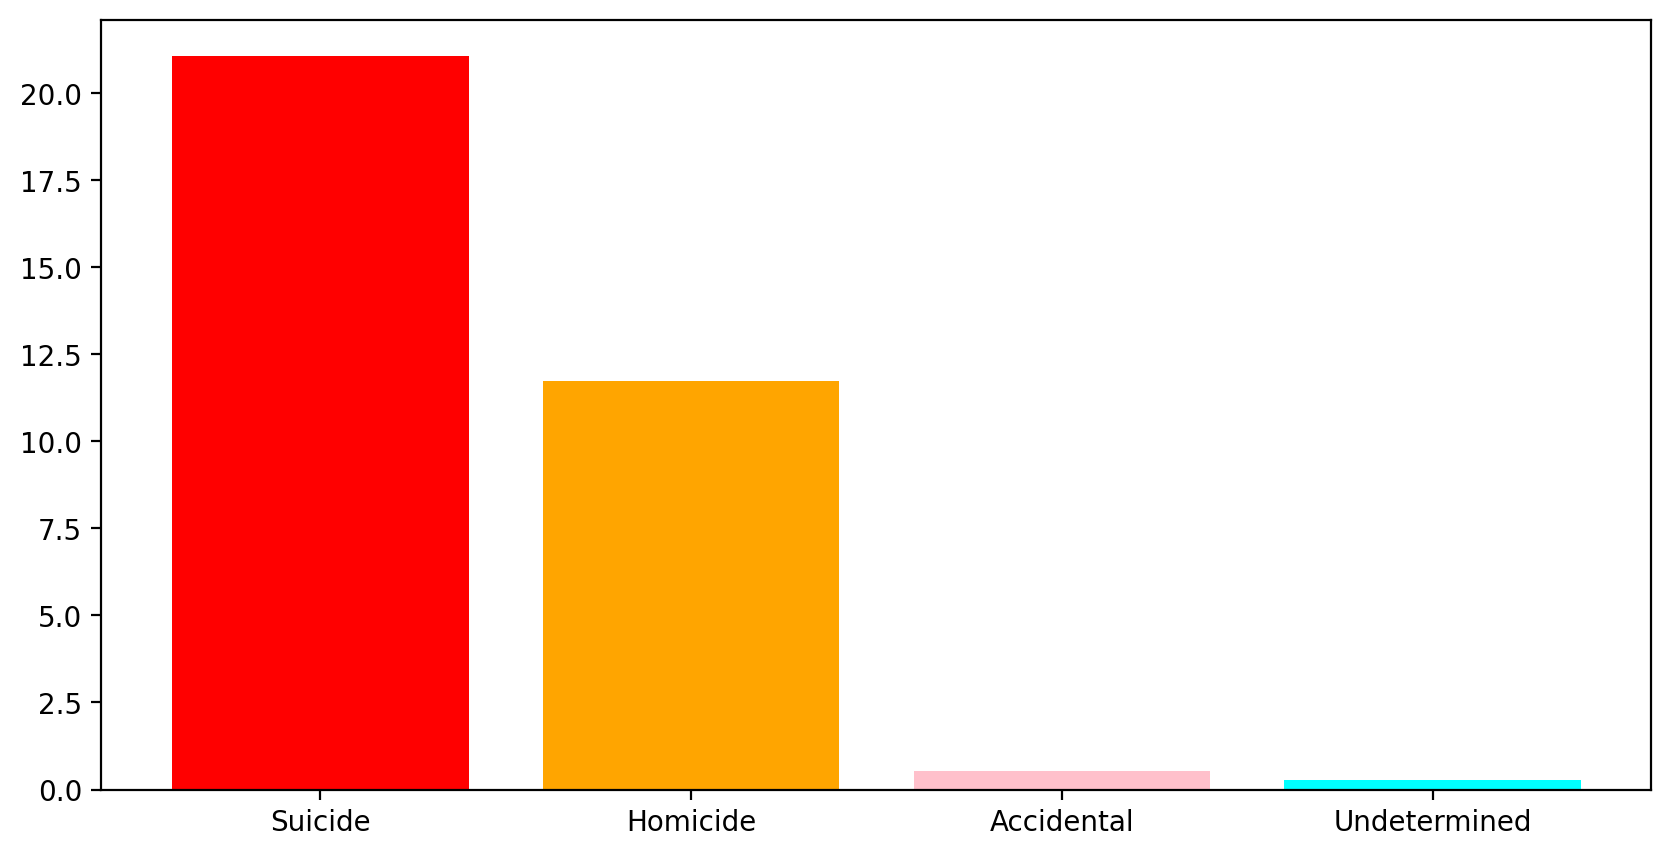

In [123]:
plt.figure(figsize=(10,5))
plt.bar(x=gun_deaths_by_intent['intent'], height=gun_deaths_by_intent['per_100'], color=['red', 'orange', 'pink', 'cyan'])